# **_Atividade de Programação Natural de Linguagem (PNL) - Parte 1_**
### **_Alunos:_** Ana Luiza F. Gouveia, Luiz Flavio Pereira
_____________________________________

Análise do dataset _Emotion Dataset for NLP_, disponível em https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp.


O presente trabalho possui por objetivo efetuar a análise do dataset através das técnicas de Análise de PNL associadas às técnicas de _Machine Learning_, com o intuito de tornar possível a identificação do sentimento implícito em um texto _inputado_ por um usuário.

In [ ]:
# Importação das bibliotecas necessárias à execução do programa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
sns.set()

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

RANDOM_STATE = 42

In [ ]:
# Download da base de dados do stopwords da biblioteca NLTK para Inglês

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

print('\nLista de stopwords em inglês: ')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

Lista de stopwords em inglês: 
{'o', 'further', 'hadn', 'yours', "needn't", "you'd", "isn't", "shouldn't", 'be', 'had', 'through', 'he', 'ain', "hasn't", 'been', 'your', 'more', "should've", 'y', 'doesn', 'needn', 'any', 'those', 'my', 'don', 'but', 'out', 'that', "don't", 'now', 'into', 'you', 'on', 'having', 'a', 'until', 'for', "mightn't", "didn't", 'me', 'so', 'when', 'll', 'mightn', 'whom', 'very', 'themselves', "weren't", 'while', "you've", 'am', 'aren', 'being', "aren't", 'nor', "shan't", 'which', 'about', 'an', 'because', 'as', 'why', 'wasn', 'where', 'no', 's', 'between', 'each', 'have', 'our', 'against', 'only', 'didn', 'yourselves', 'herself', 'just', "you'll", 'they', 'them', "doesn't", 'has', 'ma', 'down', "haven't", 'below', 'over', 'himself', 'isn', 'will', 'are', 'ours', 'of', 'few', 'what', "couldn't", 'wouldn', "that'll", 'is', 't', 'most', 'than', "wouldn't

In [ ]:
# O dataset do texto possui diversas palavras grafadas incorretamente, especialmente aquelas abreviadas com o uso do apóstrofo.
# Eh possível que isso tenha havido na extração do dataset pelo autor que o criou.
# Assim, foi-se criado um dicionário para substituir as palavras incorretas com mais ocorrência no texto para possibilitar a remoção pelas stopwords
# a fim de melhorar a performance do algoritmo.

addic = {'didnt':"didn't", 'doesnt':"doesn't", 'wasnt':"wasn't", 'shoudnt':"shouldn't", 'youll':"you'll", 'wont':"won't", 'hasnt':"hasn't", 
         'isnt':"isn't", 'wouldnt':"wouldn't", 'mightnt':"mightn't", 'shouldve':"should've", 'hadnt':"hadn't", 'shant':"shan't", 'shes':"she's", 
         'youve':"you've", 'thatll':"that'll", 'couldnt':"couldn't", 'dont':"don't", 'arent':"aren't", 'youre':"you're", 'werent':"weren't", 
         'havent':"haven't", 'im':"i am", 'ive':"i have", 'cant':"can't", 'aint':"ain't"}

In [ ]:
# Função para tratamento do texto para possibilitar a entrada no algoritmo de Machine Learning.

def text_process(original_sentences):

    # Minimização dos caracteres, a fim de se evitar a diferenciação pelo algoritmo entre letras maiúsculas e minúsculas.
    original_sentences = original_sentences.lower()

    # Remoção da pontuação e reagrupamento da string de texto.
    processing = [char for char in original_sentences if char not in string.punctuation]
    processing = ''.join(processing)

    # Substituição das palavras incorretas no texto pelas correspondentes grafadas corretamente
    processing = [addic.get(word) if word in addic.keys() else word for word in processing.split()]
    processing = ' '.join(processing)
  
    # Remoção dos stopwords das frases e reagrupamento da string de texto.
    word_seq = [word for word in processing.split() if word.lower() not in stop_words]

    return ' '.join(word_seq)

In [ ]:
# Função para exibição das métricas de medição de desempenho do algoritmo, de acordo com o resultado predito e o verdadeiro.
# Devido às características do texto, duas métricas se mostraram amsi adequadas à análise, sendo elas a acurácia e o F1-score.

def mostra_metricas(y_true, y_pred):
    print("Acurácia: ", accuracy_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred, average='weighted'))

In [ ]:
# Função para plotagem da Matriz de Confusão para comparação dos modelos.
# A função plota duas matrizes, uma para o modelo Bag of Words (BoW) e outra para o modelo Term Frequency – Inverse Document Frequency (TF-IDF)

def print_confusion_matrix(y_test1, y_pred1, y_test2, y_pred2):
    print("\nMatriz de confusão:")

    fig = plt.figure(figsize=(15,5))
    plt.subplots_adjust(wspace=0.25, hspace=0.05)
    plt.suptitle('Comparativo entre os vetorizadores BoW e TF-IDF')

    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True, cbar=False, fmt='d', xticklabels=nomes, yticklabels=nomes)
    plt.title('BoW')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)

    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, cbar=False, fmt='d', xticklabels=nomes, yticklabels=nomes)
    plt.title('TF-IDF')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0) 

    plt.show()

    return

In [ ]:
# Nomes das colunas do Dataframe
columns = ['text', 'emotion']

In [ ]:
# Importação do dataframe dos arquivos de texto

train_df = pd.read_csv('train.txt', delimiter=';', header=None, names=columns)
test_df = pd.read_csv('test.txt', delimiter=';', header=None, names=columns)
val_df = pd.read_csv('val.txt', delimiter=';', header=None, names=columns)

In [ ]:
# Devido ao fato do dataset ter sido disponibilizado em três arquivos separados, foi-se optado por uní-los e dividir o dataframe completo em duas partes: treino e teste.
# Essa escolha veio do fato dos arquivos de teste e validação não estarem categorizados de forma homogênea, podendo induzir o algoritmo a erros.

emotion_df = pd.concat([train_df, test_df, val_df])
print(f'O dataset emotion_df tem {emotion_df.shape[0]} linhas e {emotion_df.shape[1]} colunas.')

O dataset emotion_df tem 20000 linhas e 2 colunas.


In [ ]:
# Script para identificação de entradas duplicadas.

duplicat = round(sum(emotion_df.duplicated("text")))
print(f"O dataset possui {duplicat} entradas de texto duplicadas.")

O dataset possui 52 entradas de texto duplicadas.


In [ ]:
# Exibição dos textos duplicados

emotion_df[emotion_df.duplicated("text", keep=False)].sort_values(by = "text")

,text,emotion
502,i am feeling stressed and more than a bit anxious,anger
11898,i am feeling stressed and more than a bit anxious,sadness
8246,i am not amazing or great at photography but i...,love
3508,i am not amazing or great at photography but i...,joy
15705,i began to feel accepted by gaia on her own terms,joy
...,...,...
11354,i write these words i feel sweet baby kicks fr...,love
7685,im still not sure why reilly feels the need to...,surprise
2908,im still not sure why reilly feels the need to...,fear
9069,ive also made it with both sugar measurements ...,love


In [ ]:
# Remoção dos textos duplicados e confirmação da limpeza

emotion_df.drop_duplicates("text", inplace=True)

duplicat = round(sum(emotion_df.duplicated("text")))
print(f"O dataset possui {duplicat} entradas de texto duplicadas.")

O dataset possui 0 entradas de texto duplicadas.


In [ ]:
# Contagem da distribuição das categorias de sentimentos

emotion_df['emotion'].value_counts()

joy         6740
sadness     5793
anger       2703
fear        2369
love        1630
surprise     713
Name: emotion, dtype: int64

In [ ]:
print(f'O dataset emotion_df tem {emotion_df.shape[0]} linhas e {emotion_df.shape[1]} colunas.')

O dataset emotion_df tem 19948 linhas e 2 colunas.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


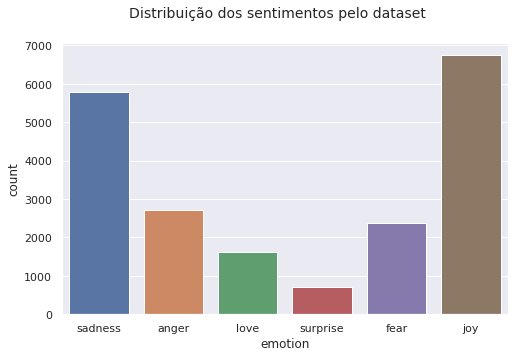

In [ ]:
# Gráfico da distribuição das categorias

_ = fig = plt.figure(figsize=(8,5))
_ = plt.suptitle('Distribuição dos sentimentos pelo dataset', fontsize=14)
_ = sns.countplot(emotion_df['emotion'])

In [ ]:
# Distribuição percentual das categorias

perc = round((emotion_df['emotion'].value_counts() * 100) / len(emotion_df['emotion']), 2)
perc

joy         33.79
sadness     29.04
anger       13.55
fear        11.88
love         8.17
surprise     3.57
Name: emotion, dtype: float64

In [ ]:
# Primeiras dez linhas do dataframe inalterado

print(emotion_df.head(10))

                                                text   emotion
0                            i didnt feel humiliated   sadness
1  i can go from feeling so hopeless to so damned...   sadness
2   im grabbing a minute to post i feel greedy wrong     anger
3  i am ever feeling nostalgic about the fireplac...      love
4                               i am feeling grouchy     anger
5  ive been feeling a little burdened lately wasn...   sadness
6  ive been taking or milligrams or times recomme...  surprise
7  i feel as confused about life as a teenager or...      fear
8  i have been with petronas for years i feel tha...       joy
9                                i feel romantic too      love


In [ ]:
# Aplicação da função de transformação do texto na coluna de texto e impressão das dez primeiras linhas da dataset alterado

processed_text = emotion_df['text'].apply(text_process)
processed_text.head(10)

0                                      feel humiliated
1    go feeling hopeless damned hopeful around some...
2               grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
5                  feeling little burdened lately sure
6    taking milligrams times recommended amount fal...
7       feel confused life teenager jaded year old man
8    petronas years feel petronas performed well ma...
9                                        feel romantic
Name: text, dtype: object

In [ ]:
# Transformação das categorias em valores numéricos para entrada no algoritmo de Machine Learning

ordinal_encoder = OrdinalEncoder()
ord_encoder_emotion = ordinal_encoder.fit_transform(emotion_df[['emotion']])
ordinal_encoder.categories_

[array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
       dtype=object)]

In [ ]:
# Extração dos nomes das categorias na ordem do Encoder para possibilitar a identificação coreta na Matrix de Confusão

nomes = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [ ]:
# Instanciação do vetorizador do Bag of Words. Foi-se optado pela classificação binária dos tokens e máximo de features em 5000.
# Outras configurações foram testadas mas não deram um resultado melhor.

text = processed_text

vectorizer = CountVectorizer(binary=True, min_df=2, max_df=0.85)
X_bow = vectorizer.fit_transform(text)
X_bow.toarray()
print(f'A matriz BoW tem {X_bow.shape[0]} linhas por {X_bow.shape[1]} colunas e eh do tipo {type(X_bow)}')

A matriz BoW tem 19948 linhas por 8080 colunas e eh do tipo <class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# Instanciação do vetorizador do TF-IDF. Foi-se optado pelo máximo de 5000 features.
# Outras configurações foram testadas mas não deram um resultado melhor.

tfidf_vect = TfidfVectorizer(min_df=2, max_df=0.85)
X_tfidf = tfidf_vect.fit_transform(text)
print(f'A matriz TF-IDF tem {X_tfidf.shape[0]} linhas por {X_tfidf.shape[1]} colunas e eh do tipo {type(X_tfidf.shape)}')

A matriz TF-IDF tem 19948 linhas por 8080 colunas e eh do tipo <class 'tuple'>


In [ ]:
# Sepearação do dataframe em sets de treino e teste.
# X1 e y1 se referem ao vetorizados BoW. X2 e y2 se referem ao vetorizador TF-IDF

X1_train, X1_test, y1_train, y1_test = train_test_split(X_bow, ord_encoder_emotion, test_size=0.25, random_state=RANDOM_STATE, stratify=ord_encoder_emotion)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_tfidf, ord_encoder_emotion, test_size=0.25, random_state=RANDOM_STATE, stratify=ord_encoder_emotion)

y1_train = y1_train.ravel()
y2_train = y2_train.ravel()

In [ ]:
print(f'O dataset de treino possui {X1_train.shape[0]} linhas e o de teste {X1_test.shape[0]} linhas.')

O dataset de treino possui 14961 linhas e o de teste 4987 linhas.


Metricas para BoW:
Acurácia:  0.8953278524162823
F1-Score: 0.8944762311140775

Metricas para TF-IDF:
Acurácia:  0.8734710246641267
F1-Score: 0.869377242386824

Matriz de confusão:


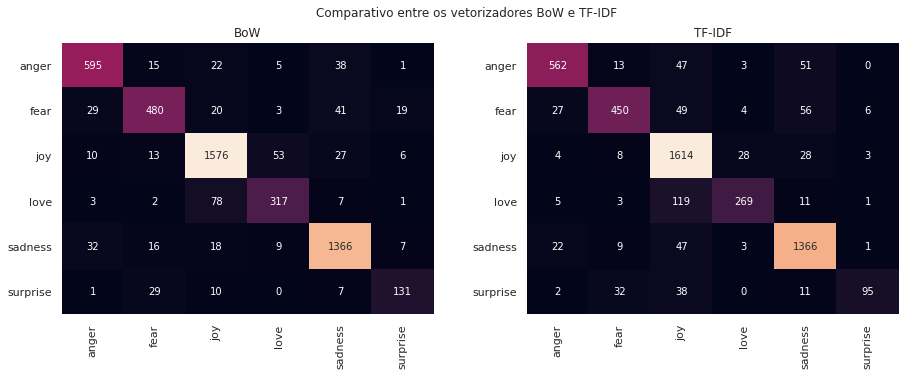

In [ ]:
# Aplicação do algoritmo de Machine Learning Logistic Regression para o BoW e para o TF-IDF

print('Metricas para BoW:')
reglog = LogisticRegression(max_iter=1000, fit_intercept=True)
reglog.fit(X1_train, y1_train)
y1_pred = reglog.predict(X1_test)
y_reglog = y1_pred
mostra_metricas(y1_test, y1_pred)

print('\nMetricas para TF-IDF:')
reglog.fit(X2_train, y2_train)
y2_pred = reglog.predict(X2_test)
mostra_metricas(y2_test, y2_pred)

print_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)

Metricas para BoW:
Acurácia:  0.8893122117505514
F1-Score: 0.8897166554538151

Metricas para TF-IDF:
Acurácia:  0.8867054341287347
F1-Score: 0.8859165202846515

Matriz de confusão:


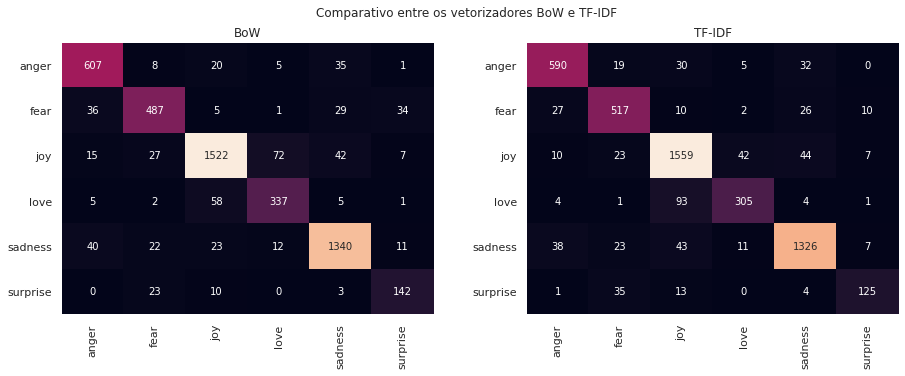

In [ ]:
# Aplicação do algoritmo de Machine Learning Random Forest para o BoW e para o TF-IDF

print('Metricas para BoW:')
rf = RandomForestClassifier()
rf.fit(X1_train, y1_train)
y1_pred = rf.predict(X1_test)
y_rf = y1_pred
mostra_metricas(y1_test, y1_pred)

print('\nMetricas para TF-IDF:')
rf.fit(X2_train, y2_train)
y2_pred = rf.predict(X2_test)
mostra_metricas(y2_test, y2_pred)

print_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)

Os algoritmos de Machine Learning abaixo foram testados e retornaram resultados muito inferiores aos dois anteriores, sendo mantidos aqui apenas comentados, caso haja interesse de sua execução posterior.

In [ ]:
'''
print('Metricas para BoW:')
knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)
y1_pred = knn.predict(X1_test)
mostra_metricas(y1_test, y1_pred)

print('\nMetricas para TF-IDF:')
knn.fit(X2_train, y2_train)
y2_pred = knn.predict(X2_test)
mostra_metricas(y2_test, y2_pred)

print_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)
'''

"\nprint('Metricas para BoW:')\nknn = KNeighborsClassifier()\nknn.fit(X1_train, y1_train)\ny1_pred = knn.predict(X1_test)\nmostra_metricas(y1_test, y1_pred)\n\nprint('\nMetricas para TF-IDF:')\nknn.fit(X2_train, y2_train)\ny2_pred = knn.predict(X2_test)\nmostra_metricas(y2_test, y2_pred)\n\nprint_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)\n"

In [ ]:
'''
print('Metricas para BoW:')
dt = DecisionTreeClassifier()
dt.fit(X1_train, y1_train)
y1_pred = dt.predict(X1_test)
mostra_metricas(y1_test, y1_pred)

print('\nMetricas para TF-IDF:')
dt.fit(X2_train, y2_train)
y2_pred = dt.predict(X2_test)
mostra_metricas(y2_test, y2_pred)

print_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)
'''

"\nprint('Metricas para BoW:')\ndt = DecisionTreeClassifier()\ndt.fit(X1_train, y1_train)\ny1_pred = dt.predict(X1_test)\nmostra_metricas(y1_test, y1_pred)\n\nprint('\nMetricas para TF-IDF:')\ndt.fit(X2_train, y2_train)\ny2_pred = dt.predict(X2_test)\nmostra_metricas(y2_test, y2_pred)\n\nprint_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)\n"

In [ ]:
'''
print('Metricas para BoW:')
mnb = MultinomialNB()
mnb.fit(X1_train.toarray(), y1_train)
y1_pred = mnb.predict(X1_test)
mostra_metricas(y1_test, y1_pred)

print('\nMetricas para TF-IDF:')
mnb.fit(X2_train.toarray(), y2_train)
y2_pred = mnb.predict(X2_test)
mostra_metricas(y2_test, y2_pred)

print_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)
'''

"\nprint('Metricas para BoW:')\nmnb = MultinomialNB()\nmnb.fit(X1_train.toarray(), y1_train)\ny1_pred = mnb.predict(X1_test)\nmostra_metricas(y1_test, y1_pred)\n\nprint('\nMetricas para TF-IDF:')\nmnb.fit(X2_train.toarray(), y2_train)\ny2_pred = mnb.predict(X2_test)\nmostra_metricas(y2_test, y2_pred)\n\nprint_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)\n"

In [ ]:
'''
print('Metricas para BoW:')
svc = SVC()
svc.fit(X1_train, y1_train)
y1_pred = svc.predict(X1_test)
mostra_metricas(y1_test, y1_pred)

print('\nMetricas para TF-IDF:')
svc.fit(X2_train, y2_train)
y2_pred = svc.predict(X2_test)
mostra_metricas(y2_test, y2_pred)

print_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)
'''

"\nprint('Metricas para BoW:')\nsvc = SVC()\nsvc.fit(X1_train, y1_train)\ny1_pred = svc.predict(X1_test)\nmostra_metricas(y1_test, y1_pred)\n\nprint('\nMetricas para TF-IDF:')\nsvc.fit(X2_train, y2_train)\ny2_pred = svc.predict(X2_test)\nmostra_metricas(y2_test, y2_pred)\n\nprint_confusion_matrix(y1_test, y1_pred, y2_test, y2_pred)\n"


Matriz de confusão:


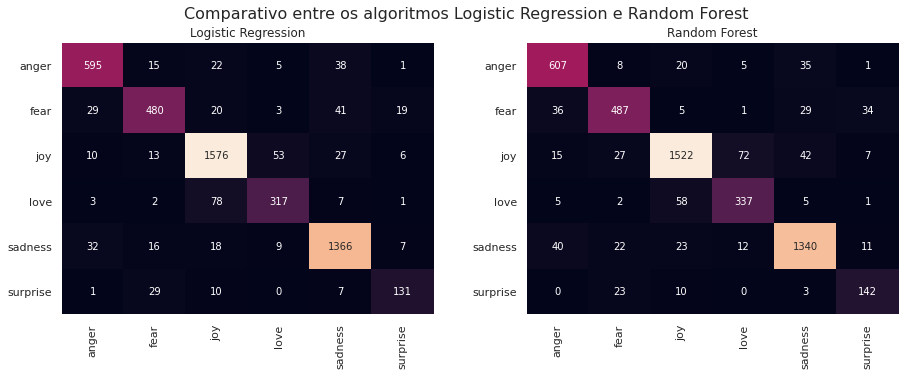

In [ ]:
# Comparação entre os melhores modelos.
# O vetorizador BoW retornou melhores resultados e por isso foi selecionado para continuidade da atividade

print("\nMatriz de confusão:")

fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.25, hspace=0.05)
plt.suptitle('Comparativo entre os algoritmos Logistic Regression e Random Forest\n\n', fontsize=16)

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y1_test, y_reglog), annot=True, cbar=False, fmt='d', xticklabels=nomes, yticklabels=nomes)
plt.title('Logistic Regression')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y1_test, y_rf), annot=True, cbar=False, fmt='d', xticklabels=nomes, yticklabels=nomes)
plt.title('Random Forest')
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.show()

In [ ]:
anger = fear = joy = love = sadness = surprise = 0

for i in (y1_test):
    if i == 0:
        anger = anger + 1
    elif i == 1:
        fear = fear + 1
    elif i == 2:
        joy = joy + 1
    elif i == 3:
        love = love + 1
    elif i == 4:
        sadness = sadness + 1
    elif i == 5:
        surprise = surprise + 1

print(f'Anger: {anger}, Fear: {fear}, Joy: {joy}, Love: {love}, Sadness: {sadness}, Surprise: {surprise}' )

Anger: 676, Fear: 592, Joy: 1685, Love: 408, Sadness: 1448, Surprise: 178


In [ ]:
# Devido ao fato do algoritmo estar correlacionando fortemente os sentimentos love e joy e também pelo fato
# de se supor que a pessoa que ama estah feliz (pelo menos deveria...), as entradas dos dois entimentos foram unidos no sentimento joy

# Da mesma forma, o mesmo foi feito com os sentimentos fear e surprise.

new_emotion_df = emotion_df.replace({'emotion':'love'}, 'joy')

new_emotion_df['emotion'].value_counts()

joy         8370
sadness     5793
anger       2703
fear        2369
surprise     713
Name: emotion, dtype: int64

In [ ]:
print(f'O dataset alterado possui {new_emotion_df.shape[0]} linhas por {new_emotion_df.shape[1]} colunas.')

O dataset alterado possui 19948 linhas por 2 colunas.


In [ ]:
# Transformação das categorias do dataset alterado para variáveis numéricas

ordinal_encoder = OrdinalEncoder()
ord_encoder_emotion_alt = ordinal_encoder.fit_transform(new_emotion_df[['emotion']])
ordinal_encoder.categories_

[array(['anger', 'fear', 'joy', 'sadness', 'surprise'], dtype=object)]

In [ ]:
# Separação do dataframe alterado em sets de treino e teste. Apenas o vetorizador BoW será utilizado pois demonstrou melhores métricas

X1_train_alt, X1_test_alt, y1_train_alt, y1_test_alt = train_test_split(X_bow, ord_encoder_emotion_alt, test_size=0.25, random_state=RANDOM_STATE, stratify=ord_encoder_emotion_alt)
y1_train_alt = y1_train_alt.ravel()

In [ ]:
nomes_alt = ['anger', 'fear', 'joy', 'sadness', 'surprise']

Metricas para Logistic Regression:
Acurácia:  0.9225987567675957
F1-Score: 0.9220419387357205

Metricas para Random Forest:
Acurácia:  0.9157810306797673
F1-Score: 0.9160893670653165

Matriz de confusão:


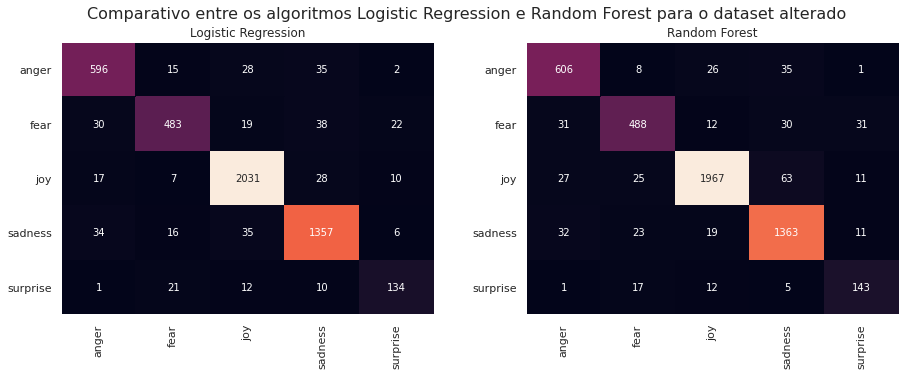

In [ ]:
print('Metricas para Logistic Regression:')
reglog2 = LogisticRegression(max_iter=1000, fit_intercept=True)
reglog2.fit(X1_train_alt, y1_train_alt)
reglog2_y1_pred = reglog2.predict(X1_test_alt)
mostra_metricas(y1_test_alt, reglog2_y1_pred)

print('\nMetricas para Random Forest:')
rf2 = RandomForestClassifier()
rf2.fit(X1_train_alt, y1_train_alt)
rf2_y1_pred = rf2.predict(X1_test_alt)
mostra_metricas(y1_test_alt, rf2_y1_pred)


print("\nMatriz de confusão:")

fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.25, hspace=0.05)
plt.suptitle('Comparativo entre os algoritmos Logistic Regression e Random Forest para o dataset alterado\n\n', fontsize=16)

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y1_test_alt, reglog2_y1_pred), annot=True, cbar=False, fmt='d', xticklabels=nomes_alt, yticklabels=nomes_alt)
plt.title('Logistic Regression')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y1_test_alt, rf2_y1_pred), annot=True, cbar=False, fmt='d', xticklabels=nomes_alt, yticklabels=nomes_alt)
plt.title('Random Forest')
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.show()


Matriz de confusão:


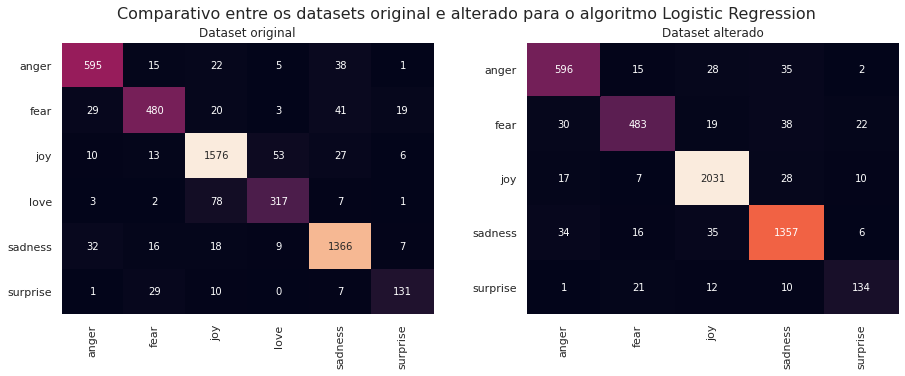

In [ ]:
# A variável love possui 408 entradas no dataset original, sendo que no dataset alterado a variavel joy foi somada em
# 455 valores. As demais variáveis tiveram um leve incremento de acertos.

print("\nMatriz de confusão:")

fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.25, hspace=0.05)
plt.suptitle('Comparativo entre os datasets original e alterado para o algoritmo Logistic Regression\n', fontsize=16)

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y1_test, y_reglog), annot=True, cbar=False, fmt='d', xticklabels=nomes, yticklabels=nomes)
plt.title('Dataset original')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y1_test_alt, reglog2_y1_pred), annot=True, cbar=False, fmt='d', xticklabels=nomes_alt, yticklabels=nomes_alt)
plt.title('Dataset alterado')
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.show()

In [ ]:
results = {0:'anger', 1:'fear', 2:'joy', 3:'love', 4:'sadness', 5:'surprise'}
results_adj = {0:'anger', 1:'fear', 2:'joy', 3:'sadness', 4:'surprise'}

In [ ]:
def nova_predicao(texto):
    texto_vetorizado = vectorizer.transform([texto])
    pred_reglog_bow = reglog.predict(texto_vetorizado)

    print(f'A classificação para RegLog com o dataframe completo foi: {results.get(pred_reglog_bow[0])}')

In [ ]:
def nova_predicao_adj(texto):
    texto_vetorizado = vectorizer.transform([texto])
    pred2_reglog_bow_alt = reglog2.predict(texto_vetorizado)

    print(f'\nA classificação para RegLog com o dataframe alterado foi: {results_adj.get(pred2_reglog_bow_alt[0])}')

In [ ]:
# Drastic Actions - Bad Religion
nova_predicao("I heard a word, suicide And not from one, but from thousands that died")
nova_predicao_adj("I heard a word, suicide And not from one, but from thousands that died")

A classificação para RegLog com o dataframe completo foi: sadness

A classificação para RegLog com o dataframe alterado foi: sadness


In [ ]:
# Chlorine - Twenty One Pilots
nova_predicao("I'm so sorry, I forgot you Let me catch you up to speed I've been tested like the ends of A weathered flag that's by the sea")
nova_predicao_adj("I'm so sorry, I forgot you Let me catch you up to speed I've been tested like the ends of A weathered flag that's by the sea")

A classificação para RegLog com o dataframe completo foi: sadness

A classificação para RegLog com o dataframe alterado foi: sadness


In [ ]:
# Rockaway Beach - Ramones
nova_predicao("Chewin' out a rhythm on my bubble gum The sun is out and I want some It's not hard, not far to reach We can hitch a ride to Rockaway Beach")
nova_predicao_adj("Chewin' out a rhythm on my bubble gum The sun is out and I want some It's not hard, not far to reach We can hitch a ride to Rockaway Beach")

A classificação para RegLog com o dataframe completo foi: joy

A classificação para RegLog com o dataframe alterado foi: joy


In [ ]:
# Pennyroyal Tea - Nirvana
nova_predicao("I'm so tired I can't sleep I'm a liar and a thief")
nova_predicao_adj("I'm so tired I can't sleep I'm a liar and a thief")

A classificação para RegLog com o dataframe completo foi: sadness

A classificação para RegLog com o dataframe alterado foi: anger


In [ ]:
# Lithium - Nirvana
nova_predicao("I'm so ugly, that's okay, 'cause so are you Broke our mirrors")
nova_predicao_adj("I'm so ugly, that's okay, 'cause so are you Broke our mirrors")

A classificação para RegLog com o dataframe completo foi: sadness

A classificação para RegLog com o dataframe alterado foi: sadness


In [ ]:
# Struck a Nerve - Bad Religion
nova_predicao("Everyday I wander in negative disposition As I'm bombarded by superlatives")
nova_predicao_adj("Everyday I wander in negative disposition As I'm bombarded by superlatives")

A classificação para RegLog com o dataframe completo foi: joy

A classificação para RegLog com o dataframe alterado foi: joy


In [ ]:
# Sliver - Nirvana
nova_predicao("After dinner I had ice cream I fell asleep and watched TV I woke up in my mother's arms")
nova_predicao_adj("After dinner I had ice cream I fell asleep and watched TV I woke up in my mother's arms")

A classificação para RegLog com o dataframe completo foi: sadness

A classificação para RegLog com o dataframe alterado foi: anger


In [ ]:
# Falling Away From Me - Korn
nova_predicao("Hey, I'm feeling tired My time has gone today You flirt with suicide Sometimes that's okay")
nova_predicao_adj("Hey, I'm feeling tired My time has gone today You flirt with suicide Sometimes that's okay")

A classificação para RegLog com o dataframe completo foi: sadness

A classificação para RegLog com o dataframe alterado foi: joy


In [ ]:
# Romeo and Julliet - Dire Straits
nova_predicao("You said I love you like the stars above, I'll love you 'til I die")
nova_predicao_adj("You said I love you like the stars above, I'll love you 'til I die")

A classificação para RegLog com o dataframe completo foi: love

A classificação para RegLog com o dataframe alterado foi: joy


In [ ]:
# Angels - Rob Williams
nova_predicao("And through it all she offers me protection A lot of love and affection Whether I'm right or wrong")
nova_predicao_adj("And through it all she offers me protection A lot of love and affection Whether I'm right or wrong")

A classificação para RegLog com o dataframe completo foi: sadness

A classificação para RegLog com o dataframe alterado foi: fear


In [ ]:
# Lose your Head - Bad Religion
nova_predicao("And though recent developments seem like bad news for humanity Self-pity is always a case of mistake identity")
nova_predicao_adj("And though recent developments seem like bad news for humanity Self-pity is always a case of mistake identity")

A classificação para RegLog com o dataframe completo foi: sadness

A classificação para RegLog com o dataframe alterado foi: sadness


In [ ]:
# I don't Want to Miss a Thing - Aerosmith
nova_predicao("And I just want to hold you close I feel your heart so close to mine And just stay here in this moment For all the rest of time")
nova_predicao_adj("And I just want to hold you close I feel your heart so close to mine And just stay here in this moment For all the rest of time")

A classificação para RegLog com o dataframe completo foi: sadness

A classificação para RegLog com o dataframe alterado foi: joy


In [ ]:
#Ha Ha You're Dead - Green Day

nova_predicao("Ha ha you're dead And I'm so happy In loving memory Of your demise")
nova_predicao_adj("Ha ha you're dead And I'm so happy In loving memory Of your demise")

A classificação para RegLog com o dataframe completo foi: love

A classificação para RegLog com o dataframe alterado foi: joy


________________________________
## _**Conclusão**_:

### O modelo escolhido foi o algoritmo Logistic Regression com o dataset original.

#### Comparando-se os trechos das músicas acima citados com os resultados preditos, pode-se concluir que o dataset alterado associado ao algoritmo Logistic Regression não entregou melhores resultados, sendo bem pior nas previsões que o original, apesar de maior acurácia.

#### Diversas técnicas foram experimentadas, mas as que entregaram melhores resultados foram as expostas no código-fonte. Técnicas como stemização e lematização pioraram os resultados. Alterar a lista de stopwords também não melhorou o resultado. A simulação com o dataset sem alteração nas palavras abreviadas teve acurácia um pouco inferior. A alteração do dataset que melhor evoluiu o desempenho foi a remoção das entradas repetidas. Apenas este procedimento elevou a acurácia em 1 ponto.

#### O baixo desempenho do modelo pode ser explicado pelo fato do dataset não possuir muitos dados e pelo fato do dataset estar cheio de gírias, abreviações, erros de grafia e muitas palavras abreviadas que não puderam ser substituídas, como por exemplo hell e shell (he'll e she'll respectivamente).